# Property estimation - Regression model
predict the price of the property based on the features.
dataset: home price dataset from kaggel
    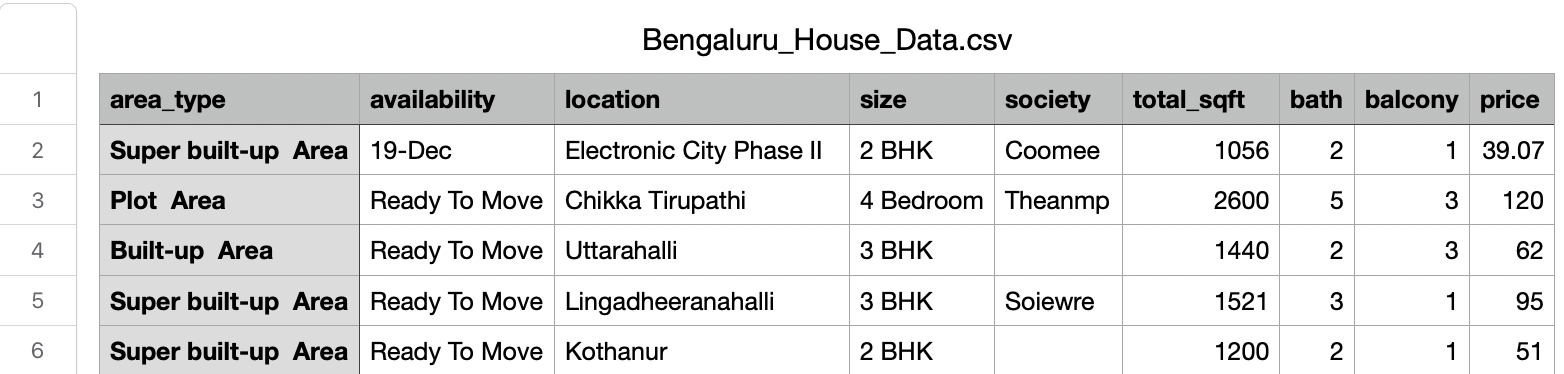
    
here, here price is the dependent feature (Y) as we are predicting the price in INR lakhs.
supervised learning is used.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [3]:
cd Desktop/data/houseprediction/

/Users/anithas/Desktop/data/houseprediction


In [4]:
ls

Bengaluru_House_Data.csv.xls


In [5]:
df = pd.read_csv('Bengaluru_House_Data.csv.xls')

In [6]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# DATA CLEANING

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
df.duplicated().sum()

529

In [11]:
df.shape

(13320, 9)

In [12]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [19]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [20]:
#we can drop availability,society,balcony,area_type

df2 = df.drop(['area_type','availability','society','balcony'], axis='columns')

In [21]:
df2.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [22]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [25]:
#these values can be dropped, or we could take the median and the fill the null values with the value.

df3 = df2.dropna()

In [26]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [27]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [29]:
#consider 'size' column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [30]:
#lets create a new column with room and just add room number, instead of BHK, Bedroom etc

df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

/var/folders/ln/5g87z4851sg20yk_qkrlrvh40000gn/T/ipykernel_30063/2292466302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [31]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [33]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [35]:
df4 = df3.drop(['size'],axis='columns')

In [36]:
df4.total_sqft.unique()
#there are range specified.

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [39]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [40]:
df4[df4['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [44]:
df4[~df4['total_sqft'].apply(is_float)]
#gives all the values which are not float.

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [48]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [49]:
convert_sqft_to_num('1133 - 1384')

1258.5

In [51]:
df5 = df4.copy()

In [53]:
df5['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [54]:
df5.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# FEATURE ENGINEERING AND DIMENSIONALITY REDUCTION
helps for outlier detction 


In [55]:
df6 = df5.copy()

In [56]:
df6['price_per_sqft'] = df6['price']*100000/df6['total_sqft']
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [57]:
df6.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [58]:
df6.location.nunique()

1304

In [59]:
#this is too many data - this is a high dimensionality problem
df6.location = df6.location.apply(lambda x: x.strip())

In [60]:
location_stats = df6.groupby('location')['location'].agg('count')

In [61]:
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [62]:
location_stats = df6.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [68]:
len(location_stats)

1293

In [70]:
len(location_stats[location_stats<=10])

1052

In [71]:
loc_stats_less10 = location_stats[location_stats<=10]
loc_stats_less10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [73]:
df6.location.nunique()

1293

In [74]:
df6.location = df6.location.apply(lambda x: 'other' if x in loc_stats_less10 else x)
df6.location.nunique()

242

In [81]:
#now the values are reduced, this can be used with one hot encoding later on.
df6['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [86]:
df6.loc[df6['location'] == 'other']

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.00,6,36274.509804
18,other,2770.0,4.0,290.00,3,10469.314079
19,other,1100.0,2.0,48.00,2,4363.636364
25,other,1250.0,3.0,56.00,3,4480.000000
42,other,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...
13291,other,812.0,1.0,26.00,1,3201.970443
13292,other,1440.0,2.0,63.93,3,4439.583333
13302,other,1075.0,2.0,48.00,2,4465.116279
13306,other,1200.0,5.0,325.00,4,27083.333333


In [87]:
len(df6.loc[df6['location'] == 'other'])

2881

# OUTLIER DETECTION AND REMOVAL

std deviation or basic domain knowledge can be made used.
(sqft less than some sqft per room can be removed based on the requirement)
having a threshold.

here, lets consider as 300 these are called outliers, anomalies and these can be removed.

In [88]:
df6[df6.total_sqft/df6.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [89]:
df6.shape

(13246, 6)

In [93]:
df7 = df6[~(df6.total_sqft/df6.bhk<300)]

In [94]:
df7.shape

(12502, 6)

In [95]:
#some outliers are removed
df7.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [96]:
df7['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

here, min value is 267 which is low, max is 176470.
as we are building generic model, we can remove these extreme cases based on std deviation.

In [102]:
#std should be done per location, mean and std should be found out.

def outlier_removal(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        #anything below and above mean-std
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
        
    return df_out

In [103]:
df7.shape

(12502, 6)

In [104]:
df8 = outlier_removal(df7)
df8.shape

(10241, 6)

In [105]:
#here the outlier have been removed.

In [ ]:
#we can also see that, there are 3bhk costing less than 2bhk

In [111]:
df8.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [114]:
def scatter_plt(df,location):
    bhk2 = df[(df.location==location)& (df.bhk==2)]
    bhk3 = df[(df.location==location)& (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color ='blue',label='2BHK',s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color ='green',label='3BHK',s = 50)
    plt.title(location)
    plt.xlabel("Total square feet area")
    plt.ylabel("Proce per square feet")
    plt.legend()

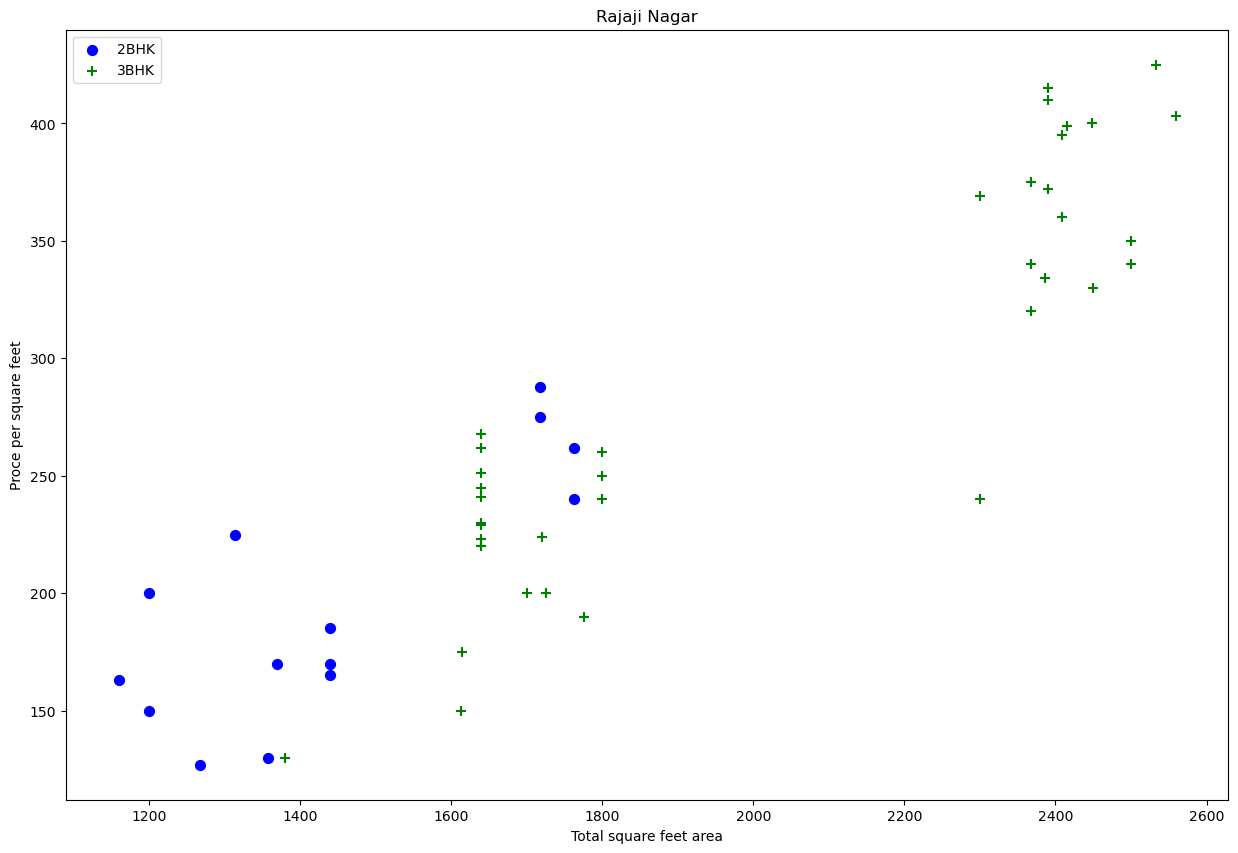

In [116]:
scatter_plt(df8,'Rajaji Nagar')

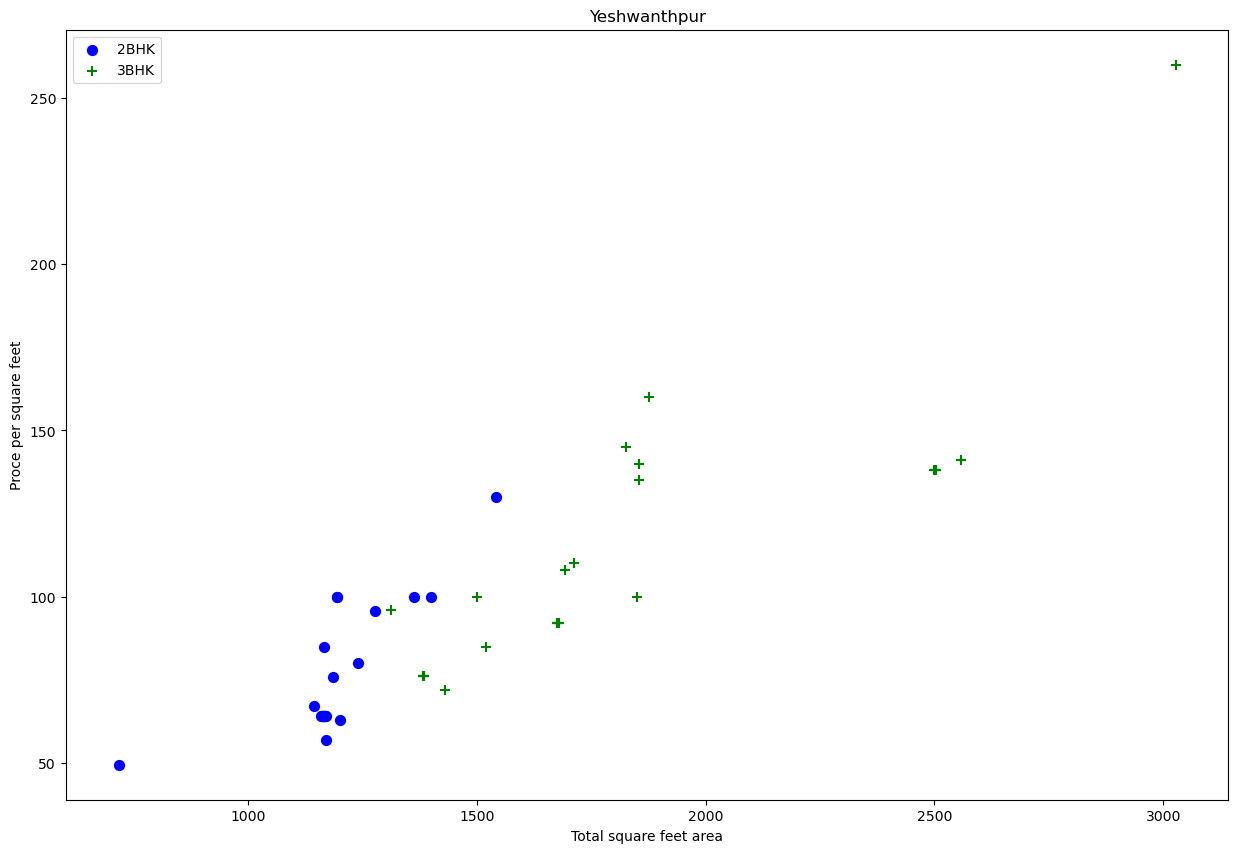

In [117]:
scatter_plt(df8,'Yeshwanthpur')

In [118]:
#we can see many outliers, which can be removed.
#we can create stats per bedroom house. 

def bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [119]:
#exclude data points which lies belond the price_per_sqft is less than mean of the previous bhk
#eg: for 2bhk, filter all values whose value is less than 2bhk mean

In [120]:
df9 = bhk_outliers(df8)

In [121]:
df9.shape

(7329, 6)

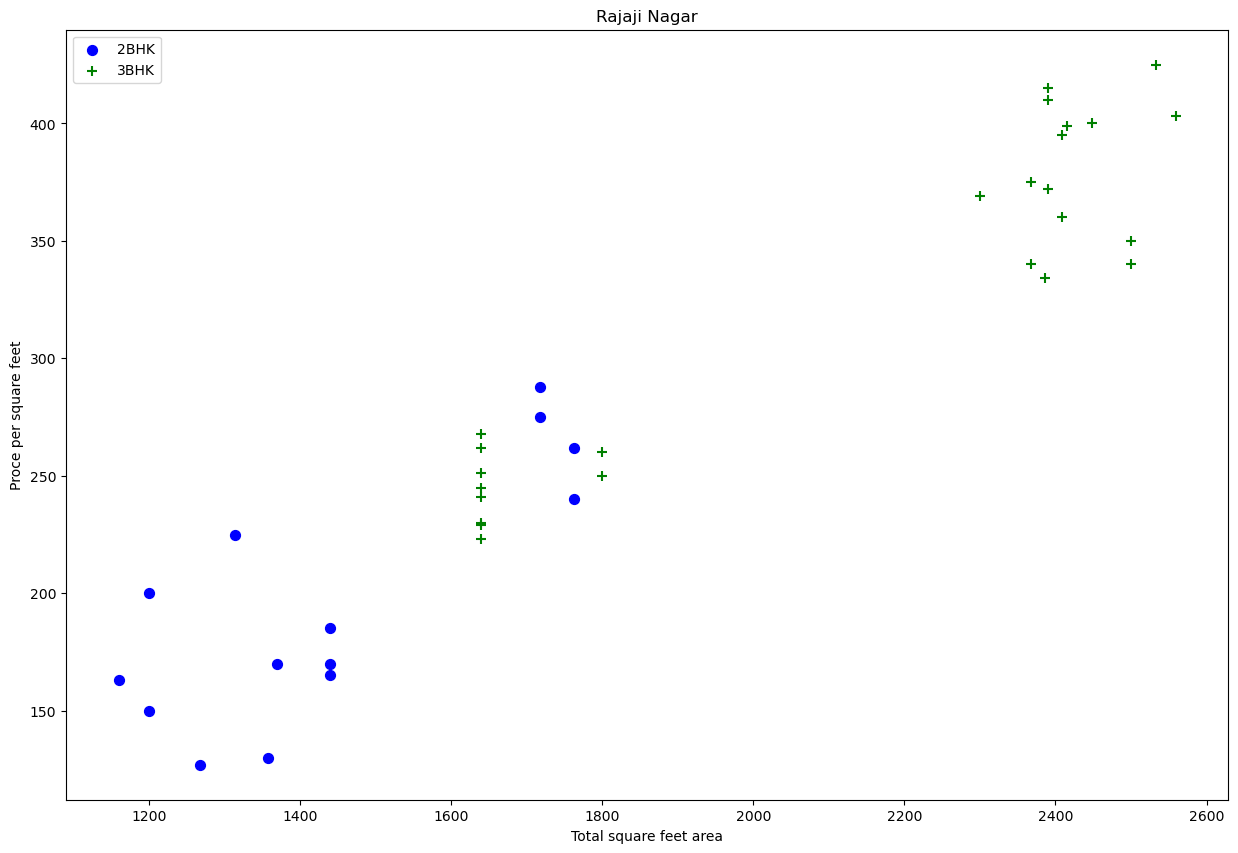

In [122]:
scatter_plt(df9,'Rajaji Nagar')

Text(0, 0.5, 'count')

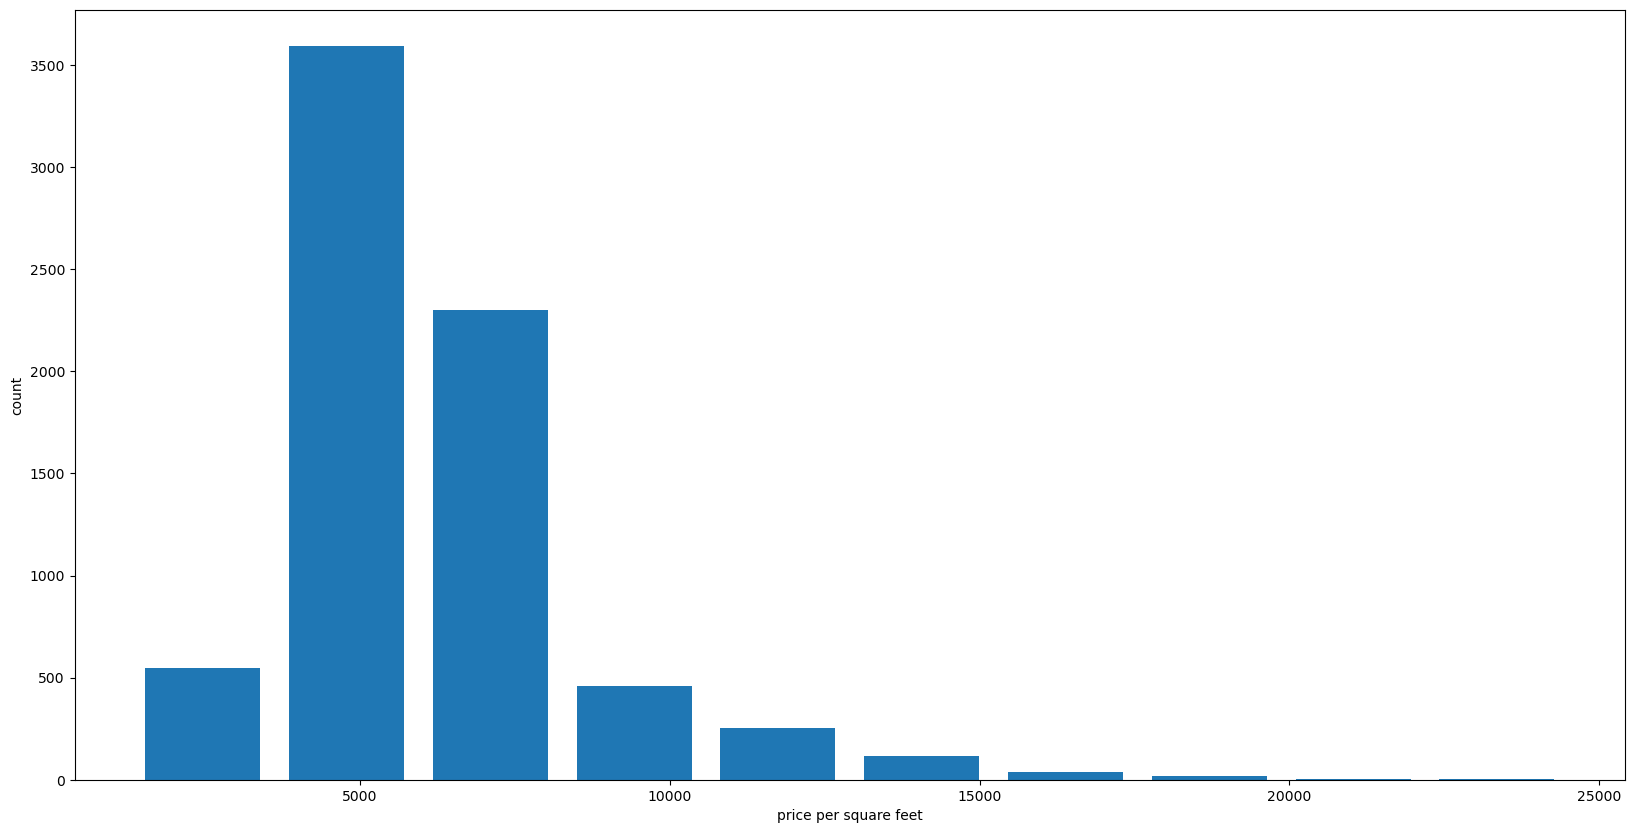

In [123]:
#lets plot histogram, how many apartments are per sqft

matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [124]:
#from 0-10000rs per sqft is max. 


In [126]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [127]:
df9[df9.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


In [128]:
#this can also be modified based on the bhk. based on requirements , we can modify this.
#suppose, if bath more than bedroom+2, then remove.

Text(0, 0.5, 'count')

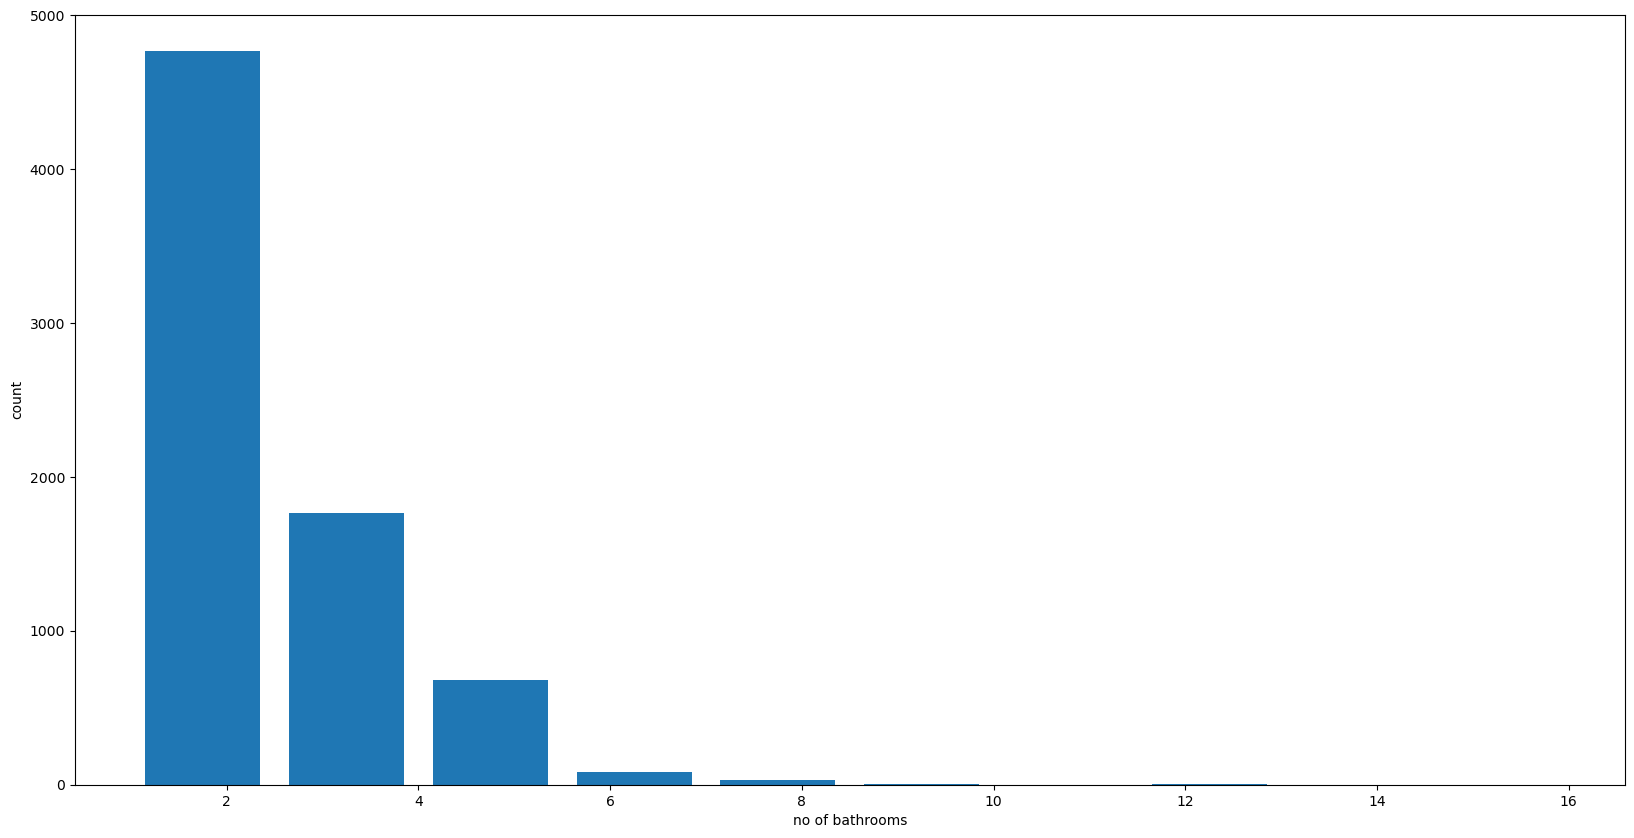

In [129]:
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("no of bathrooms")
plt.ylabel("count")

In [130]:
#we can see most properties with 1-5 are more.

In [135]:
df9[df9.bath>df9.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [132]:
df9.shape

(7329, 6)

In [137]:
#these are outliers whcih can be removed.
df10 = df9[df9.bath<df9.bhk+2]
df10.shape

(7251, 6)

In [141]:
#we can now remove, price_per_sqt as it was used fro outlier detction.

final_data = df10.drop(['price_per_sqft'],axis='columns')

In [142]:
final_data

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


# Build MACHINE LEARNING MODEL

In [153]:
final_data.dtypes

location       object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

In [155]:
#here location field is not a numeric info, hence cant be applied to a model.
#so we need to convert to numeric and this can be done by using OHE
#dummies method is used.

dummies = pd.get_dummies(final_data.location)

#for each of the locations, new column is created, for a value, then its set 1 remaining are 0


In [156]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [157]:
#to avoid dummies varibale trap, we should have one less dummy column. 

In [159]:
dataset = pd.concat([final_data,dummies.drop('other',axis = 'columns')],axis='columns')
dataset.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [160]:
dataset.tail()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
10232,other,1200.0,2.0,70.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10233,other,1800.0,1.0,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10236,other,1353.0,2.0,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,other,812.0,1.0,26.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10240,other,3600.0,5.0,400.0,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [161]:
final_dataset = dataset.drop('location', axis='columns')

In [163]:
final_dataset.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [164]:
#independent variables
X = final_dataset.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [165]:
y = final_dataset.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [167]:
#linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8452277697874319

In [168]:
#lets use a K-FOLD cross validation
#shuffle split, randomises each of the splits so that it has equal distribution

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [172]:
#trying other regression algorithms, to see which gives best score.
#grid search cv - to run model on different regression and shows the best params as well.

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params':{
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree' : {
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }    
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [173]:
best_model(X,y)

/Users/anithas/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anithas/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anithas/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Users/anithas/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/Users/anithas/anacond

,model,best_score,best_params
0,linear_regression,0.819001,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.687430,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.726496,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [174]:
#from above result we can tell, linear regression model is best!

In [176]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [180]:
np.where(X.columns=='6th Phase JP Nagar')[0][0]

9

In [175]:
#lets make property price prediction

def price_prediction(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1
    
    return lr.predict([x])[0]

In [184]:
dataset.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [186]:
price_prediction('1st Block Jayanagar',2850.0,4.0,4)

/Users/anithas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


355.5227151886476

In [187]:
price_prediction('1st Block Jayanagar',1000.0,2,2)

/Users/anithas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


201.99197906792153

In [188]:
price_prediction('Indira Nagar',1000.0,2,2)

/Users/anithas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484007021

In [190]:
price_prediction('1st Block Jayanagar',1000.0,2,4)

/Users/anithas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


198.44622353943072

# Validation of the model

In [192]:
y_pred=lr.predict(X_test)

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

783.2659935250106
16.594897994157453
27.98688967221993


# 
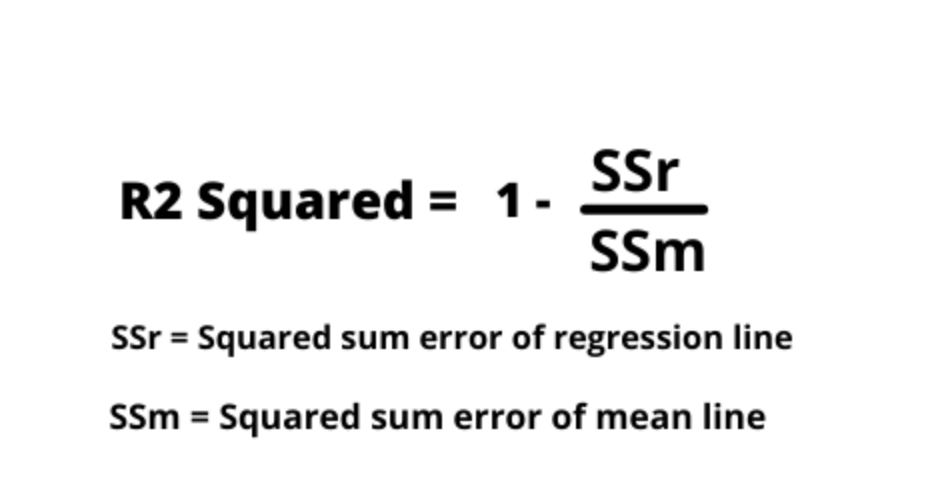

In [195]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)


0.8452277697874319



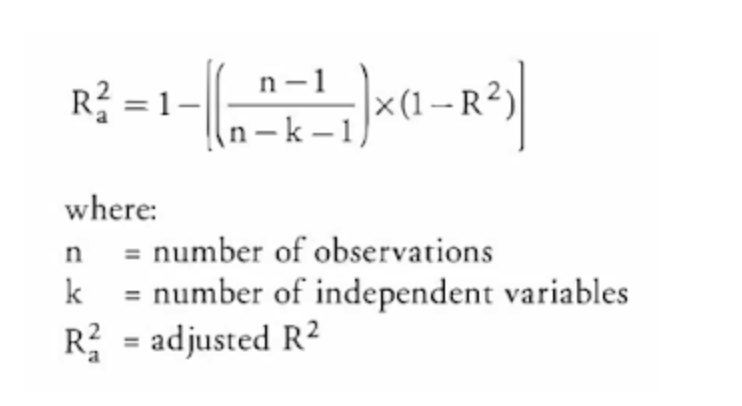

In [197]:
#adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8139139852336452


In [205]:
#adjusted R-squared IS less than R-squared, whcih is good

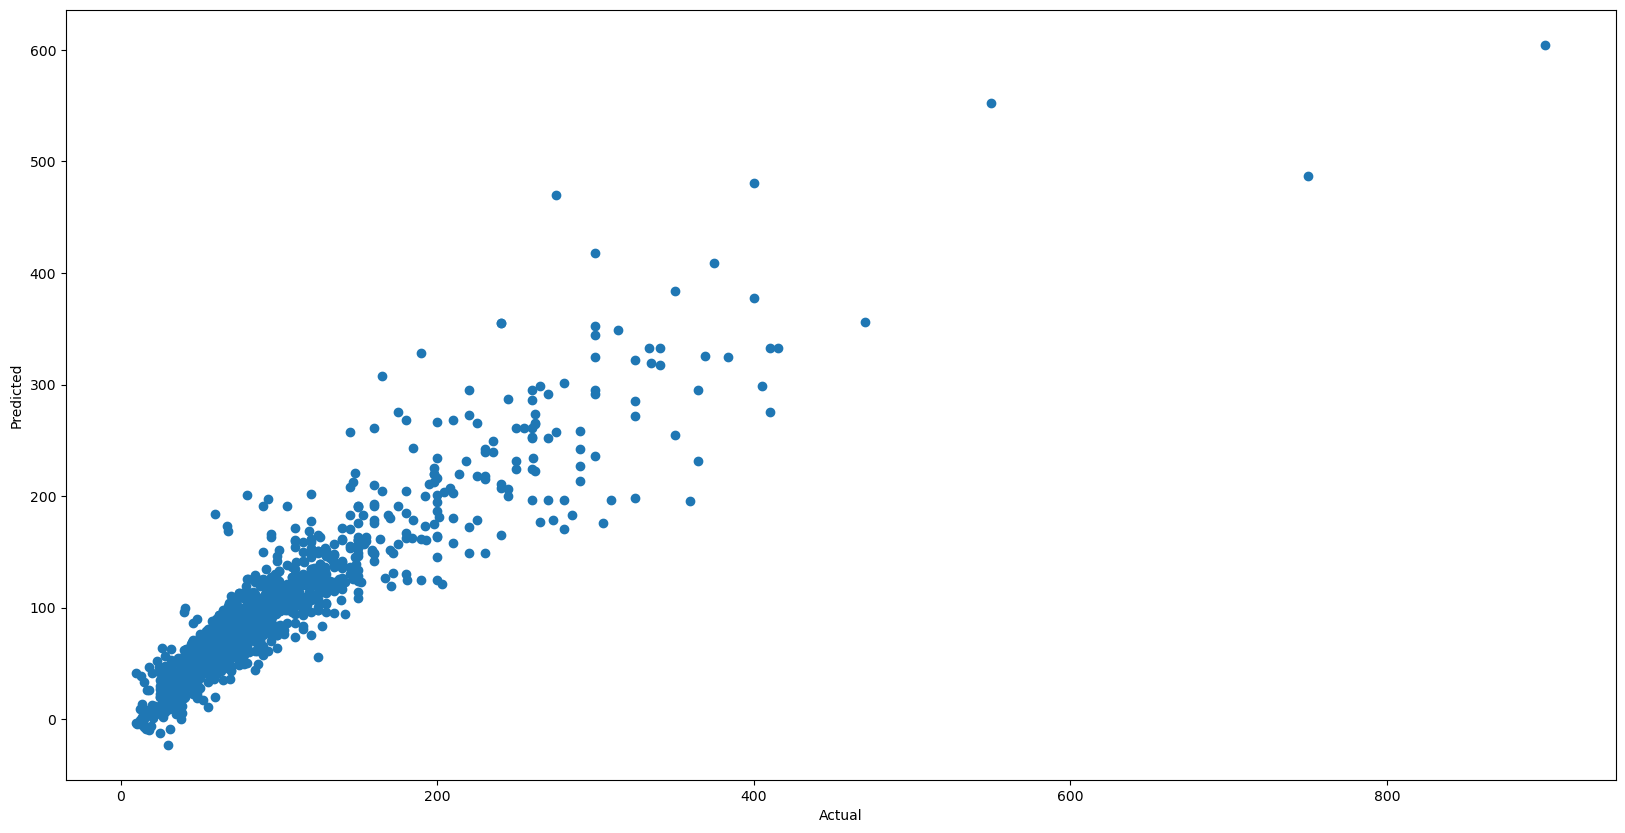

In [236]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual');
plt.ylabel('Predicted');

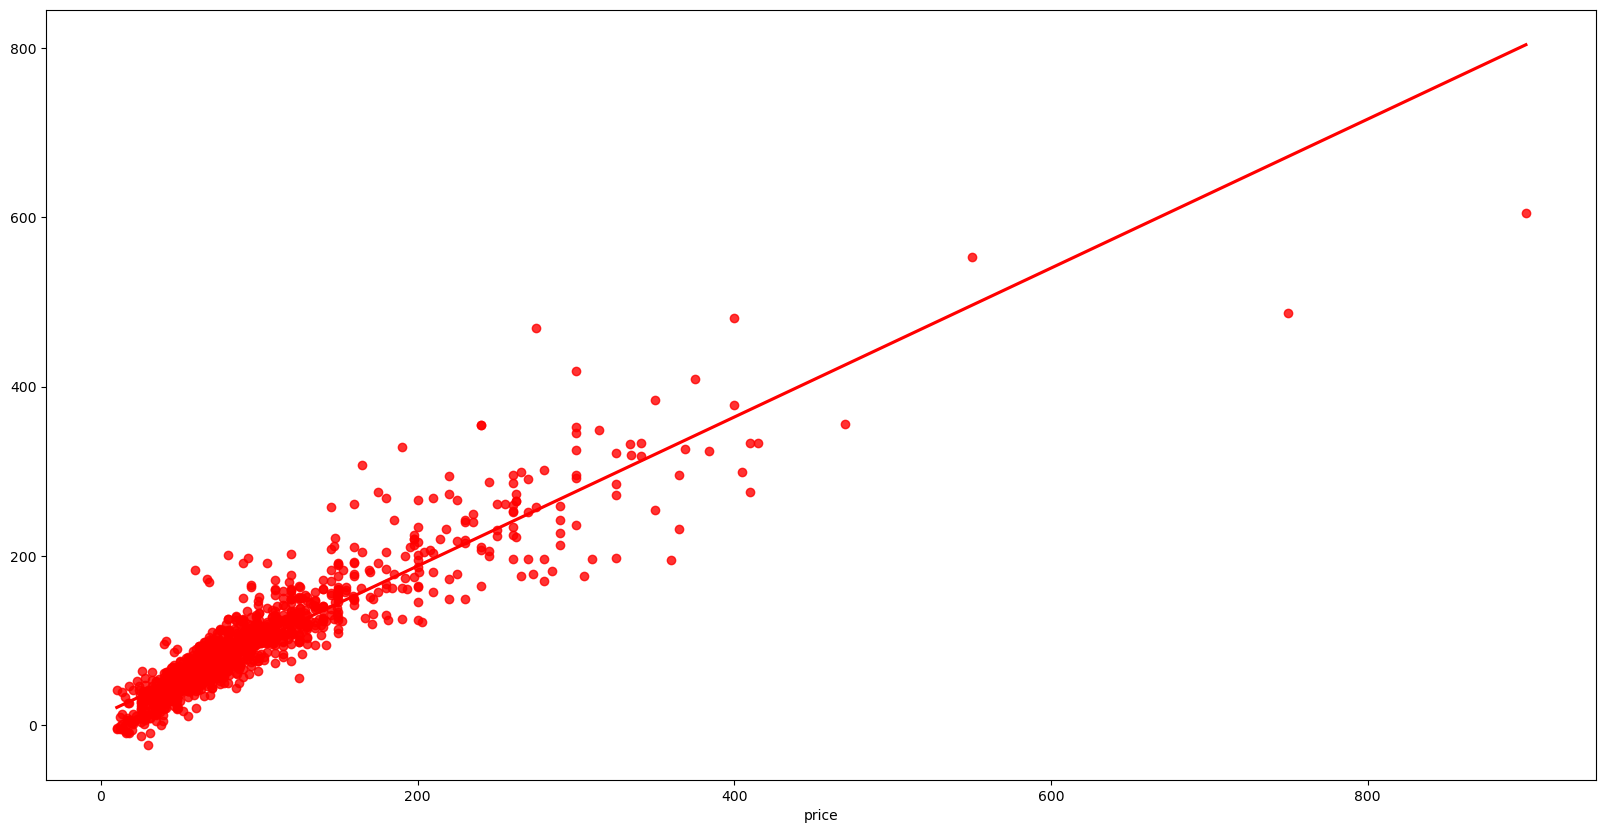

In [237]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [238]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [239]:
pred_df

,Actual Value,Predicted Value,Difference
1189,68.00,70.478963,-2.478963
6016,42.00,33.093124,8.906876
4008,46.00,36.004331,9.995669
5036,116.00,106.109483,9.890517
4815,109.00,109.271556,-0.271556
...,...,...,...
3274,85.00,102.583221,-17.583221
3808,55.00,68.851000,-13.851000
1342,31.48,29.458053,2.021947
853,65.12,58.433063,6.686937


/Users/anithas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


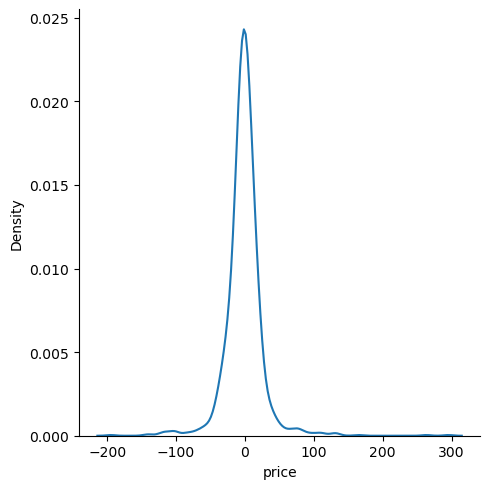

In [202]:
import seaborn as sns
sns.displot(residuals,kind = 'kde') 

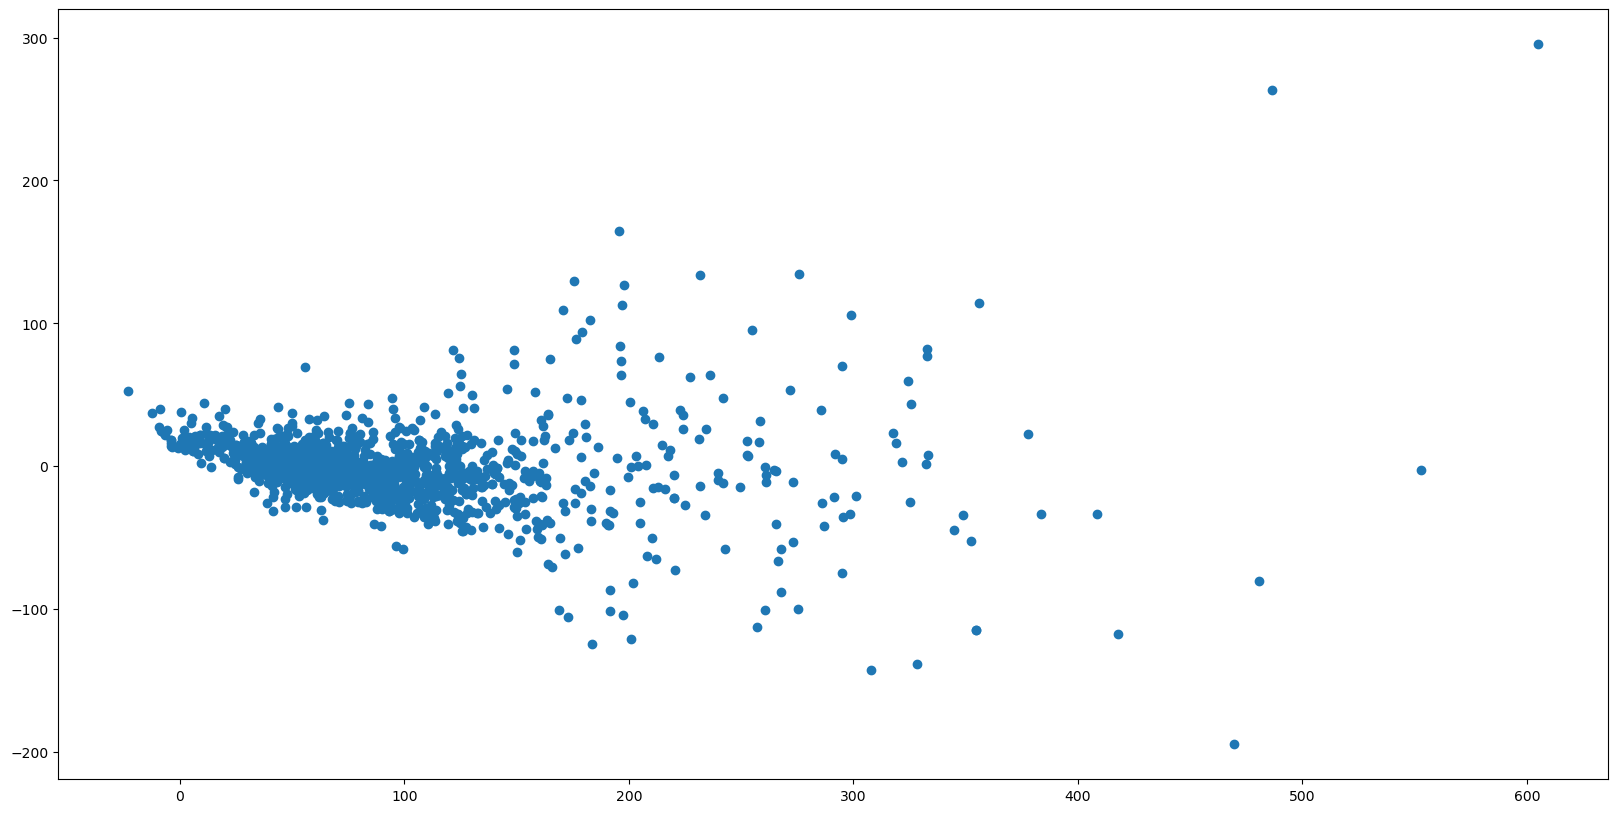

In [203]:
plt.scatter(y_pred,residuals)